In [1]:
import pandas as pd
import numpy as np
import math

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/afoone/caipc-mar-2023/master/data/Advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
import statsmodels.formula.api as smf

In [8]:
modelo = smf.ols(formula='Sales~TV', data=df).fit()

In [9]:
modelo.params

Intercept    7.032594
TV           0.047537
dtype: float64

#### Sales = 7.032594 + 0.047537 * TV

In [10]:
sales_prediction = modelo.predict(df['TV'])

In [11]:
sales_prediction


0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [12]:
import matplotlib.pyplot as plt

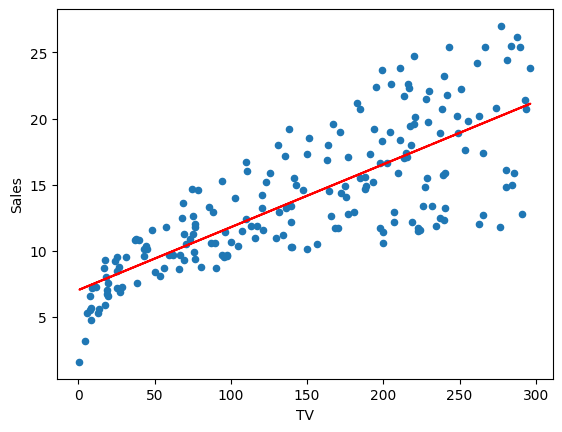

In [16]:
%matplotlib inline
df.plot(kind='scatter', x="TV", y="Sales")
plt.plot(df['TV'], sales_prediction, color="red")

In [18]:
modelo.rsquared # está entre 0 y 1, cuanto mayor, mejor...

0.611875050850071

In [19]:
modelo.rsquared_adj

0.6099148238341623

In [20]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        18:49:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df['predicted'] = sales_prediction

In [22]:
df.head()

,TV,Radio,Newspaper,Sales,predicted
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


In [26]:
rse = (df['predicted']-df['Sales'])**2

In [27]:
mse = rse.mean()

In [28]:
rmse = mse**0.5

In [29]:
rmse

3.2423221486546887

(array([ 8., 17., 16., 33., 42., 40., 17., 13., 10.,  4.]),
 array([-7.21236867, -5.65253361, -4.09269854, -2.53286348, -0.97302842,
         0.58680664,  2.14664171,  3.70647677,  5.26631183,  6.82614689,
         8.38598196]),
 <BarContainer object of 10 artists>)

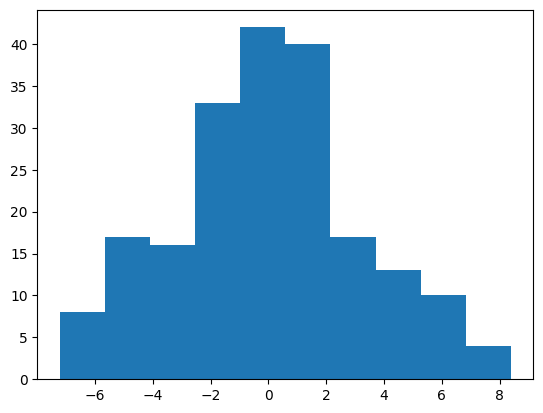

In [33]:
plt.hist(df['predicted']-df['Sales']) # es necesario que los errores se distribuyan normalmente

# Regresión múltiple

```
Sales~TV
Sales~Newspaper
Sales~Radio
Sales~TV+Newspaper
Sales~TV+Radio
Sales~Newspaper+Radio
Sales~TV+Radio+Newspaper
```


In [35]:
modelo_tn = smf.ols(formula='Sales~TV+Newspaper', data= df ).fit()

In [36]:
modelo_tn.rsquared_adj

0.6422399150864777

In [37]:
modelo_tn.params


Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [38]:
modelo_tn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           3.95e-45
Time:                        19:03:34   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
modelo_tn.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.642    
Dependent Variable: Sales            AIC:                1025.7782
Date:               2023-04-03 19:03 BIC:                1035.6731
No. Observations:   200              Log-Likelihood:     -509.89  
Df Model:           2                F-statistic:        179.6    
Df Residuals:       197              Prob (F-statistic): 3.95e-45 
R-squared:          0.646            Scale:              9.7389   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     5.7749     0.5253   10.9928   0.0000   4.7389   6.8110
TV            0.0469     0.0026   18.1727   0.0000   0.0418   0.0520
Newspaper     0.0442     0.0102    4.3463   0.0000   0.0242   0.0643
------------------------------------------------------------------
Omnibus:              0.658         Durbin-Watson:           1.969
Prob(Omnibus):        0.720         Jarque-Bera (JB):        0.415
Skew:                 -0.093        Prob(JB):                0.813
Kurtosis:             3.122         Condition No.:           410  
==================================================================

"""

In [43]:
modelo = smf.ols(formula='Sales~TV+Radio', data=df).fit()
modelo.rsquared_adj

0.8961505479974428

In [44]:
modelo = smf.ols(formula='Sales~Newspaper+Radio', data=df).fit()
modelo.rsquared_adj



0.3259306172899197

In [46]:
modelo = smf.ols(formula='Sales~TV+Radio+Newspaper', data=df).fit()
modelo.rsquared_adj

0.8956373316204668

# Multicolinealidad

In [47]:
df.corr()

,TV,Radio,Newspaper,Sales,predicted
TV,1.000000,0.054809,0.056648,0.782224,1.000000
Radio,0.054809,1.000000,0.354104,0.576223,0.054809
Newspaper,0.056648,0.354104,1.000000,0.228299,0.056648
Sales,0.782224,0.576223,0.228299,1.000000,0.782224
predicted,1.000000,0.054809,0.056648,0.782224,1.000000


# Linealidad

In [57]:
ventas = {
    'vallas': [1,2,3,4,5,6,7,8,9],
    'ventas': [12.6, 17.1, 31, 63, 160, 415, 1110, 3000, 8120]
}

In [58]:
ventas_df = pd.DataFrame(ventas)

In [59]:
ventas_df.describe()

,vallas,ventas
count,9.000000,9.000000
mean,5.000000,1436.522222
std,2.738613,2687.874191
min,1.000000,12.600000
25%,3.000000,31.000000
50%,5.000000,160.000000
75%,7.000000,1110.000000
max,9.000000,8120.000000


<Axes: xlabel='vallas'>

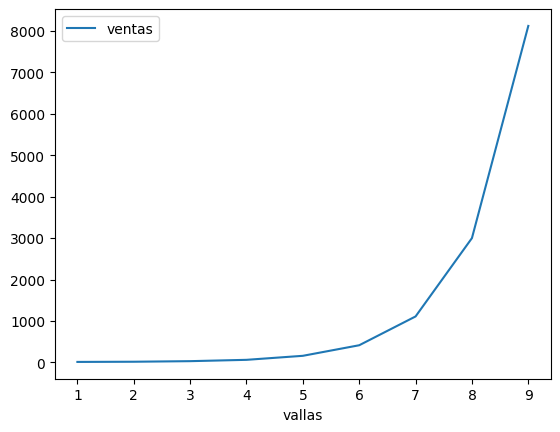

In [61]:
ventas_df.plot(kind = 'line', x='vallas', y = 'ventas')

In [62]:
modelo_1 = smf.ols(formula='ventas~vallas', data=ventas_df).fit()

In [63]:
modelo_1.rsquared_adj

0.49193326133698767

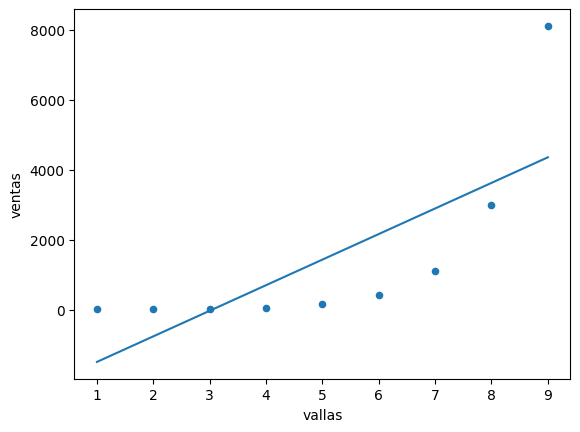

In [66]:
%matplotlib inline 
ventas_df.plot(kind = 'scatter', x='vallas', y = 'ventas')
plt.plot(ventas_df['vallas'], modelo_1.predict(ventas_df['vallas']))

In [68]:
ventas_df['ventas_log'] = ventas_df['ventas'].apply(lambda x: np.log(x))

<Axes: xlabel='vallas', ylabel='ventas_log'>

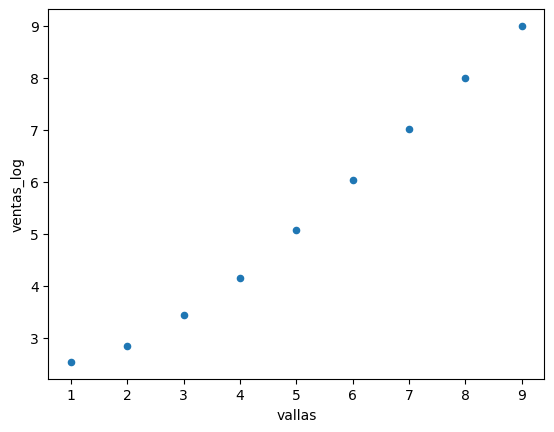

In [70]:
ventas_df.plot(kind = 'scatter', x='vallas', y = 'ventas_log')

In [71]:
modelo_3 =  smf.ols(formula='ventas_log~vallas', data=ventas_df).fit()

In [72]:
modelo_3.rsquared_adj

0.9816516982340702

# SKLearn


In [74]:
df

,TV,Radio,Newspaper,Sales,predicted
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,8.848493
196,94.2,4.9,8.1,9.7,11.510545
197,177.0,9.3,6.4,12.8,15.446579
198,283.6,42.0,66.2,25.5,20.513985


In [76]:
df = df.drop(columns=['predicted'])

In [77]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [79]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df ['Sales']

In [80]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [81]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Selección de características



In [83]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


# estimador
estimador = SVR(kernel='linear')
selector = RFE(estimator=estimador, n_features_to_select=2, step=1)


In [84]:
selector.fit(X, y)

RFE(estimator=SVR(kernel='linear'), n_features_to_select=2)

In [85]:
selector.support_


array([ True,  True, False])

In [88]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [90]:
from sklearn.linear_model import LinearRegression 

In [91]:
m = LinearRegression()
m.fit(X[['TV', 'Radio']], y)

LinearRegression()

In [92]:
m.coef_

array([0.04575482, 0.18799423])

In [93]:
m.intercept_

2.9210999124051362

In [96]:
# R2

m.score(X[['TV', 'Radio']], y)

0.8971942610828956